# **Problem : medication classification**


## I. Get the data

**1.Download the data**

In [1]:
from pathlib import Path
import pandas as pd
import zipfile
import urllib.request

def load_medicine_data():
    zip_path = Path("datasets/main.zip")
    if not zip_path.is_file():
        Path("datasets").mkdir(parents=True, exist_ok=True)
        url = "https://github.com/vanquyen607/medicine_dataset/archive/refs/heads/main.zip" # updated URL
        urllib.request.urlretrieve(url, zip_path)

        with zipfile.ZipFile(zip_path, 'r') as zip_ref:
            zip_ref.extractall(path="datasets")

    return pd.read_csv(Path("datasets/medicine_dataset-main/Medicine_Details.csv"))

Medicine_Details = load_medicine_data()

**2.Take a Quick Look at the Data Structure**


In [2]:
Medicine_Details.head()

,Medicine Name,Composition,Uses,Side_effects,Image URL,Manufacturer,Excellent Review %,Average Review %,Poor Review %
0,Avastin 400mg Injection,Bevacizumab (400mg),Cancer of colon and rectum Non-small cell lun...,Rectal bleeding Taste change Headache Noseblee...,"https://onemg.gumlet.io/l_watermark_346,w_480,...",Roche Products India Pvt Ltd,22,56,22
1,Augmentin 625 Duo Tablet,Amoxycillin (500mg) + Clavulanic Acid (125mg),Treatment of Bacterial infections,Vomiting Nausea Diarrhea Mucocutaneous candidi...,"https://onemg.gumlet.io/l_watermark_346,w_480,...",Glaxo SmithKline Pharmaceuticals Ltd,47,35,18
2,Azithral 500 Tablet,Azithromycin (500mg),Treatment of Bacterial infections,Nausea Abdominal pain Diarrhea,"https://onemg.gumlet.io/l_watermark_346,w_480,...",Alembic Pharmaceuticals Ltd,39,40,21
3,Ascoril LS Syrup,Ambroxol (30mg/5ml) + Levosalbutamol (1mg/5ml)...,Treatment of Cough with mucus,Nausea Vomiting Diarrhea Upset stomach Stomach...,"https://onemg.gumlet.io/l_watermark_346,w_480,...",Glenmark Pharmaceuticals Ltd,24,41,35
4,Aciloc 150 Tablet,Ranitidine (150mg),Treatment of Gastroesophageal reflux disease (...,Headache Diarrhea Gastrointestinal disturbance,"https://onemg.gumlet.io/l_watermark_346,w_480,...",Cadila Pharmaceuticals Ltd,34,37,29


In [3]:
Medicine_Details.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11825 entries, 0 to 11824
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Medicine Name       11825 non-null  object
 1   Composition         11825 non-null  object
 2   Uses                11825 non-null  object
 3   Side_effects        11825 non-null  object
 4   Image URL           11825 non-null  object
 5   Manufacturer        11825 non-null  object
 6   Excellent Review %  11825 non-null  int64 
 7   Average Review %    11825 non-null  int64 
 8   Poor Review %       11825 non-null  int64 
dtypes: int64(3), object(6)
memory usage: 831.6+ KB


In [4]:
Medicine_Details["Medicine Name"].value_counts()

,count
Medicine Name,
Lulifin Cream,4
Benadryl Syrup,3
Livoluk Oral Solution,3
Nebistar 5 Tablet,3
Amrolstar Cream,3
...,...
Jubira 10 Tablet,1
Joincerin M Tablet,1
Jupiros 20 Tablet,1


In [5]:
Medicine_Details.describe()

,Excellent Review %,Average Review %,Poor Review %
count,11825.000000,11825.000000,11825.000000
mean,38.516025,35.756364,25.727611
std,25.225343,18.268134,23.991985
min,0.000000,0.000000,0.000000
25%,22.000000,27.000000,0.000000
50%,34.000000,35.000000,22.000000
75%,51.000000,47.000000,35.000000
max,100.000000,88.000000,100.000000


## II. Explore and visualize the data to gain insights.

**1.Visualizing geographical data**

In [6]:
# Analyzing the distribution of medicines by their uses
use_distribution = Medicine_Details['Uses'].value_counts()

# Analyzing the top manufacturers
manufacturer_distribution = Medicine_Details['Manufacturer'].value_counts()

# Descriptive statistics for review percentages
review_stats = Medicine_Details[['Excellent Review %', 'Average Review %', 'Poor Review %']].describe()

use_distribution, manufacturer_distribution.head(), review_stats


(Uses
 Treatment of Type 2 diabetes mellitus                                                   907
 Treatment of Bacterial infections                                                       439
  Hypertension (high blood pressure)                                                     405
  Pain relief                                                                            385
 Treatment of Hypertension (high blood pressure)                                         279
                                                                                        ... 
 Treatment of Hypertensive emergency                                                       1
  Eye infectionTreatment of Inflammatory conditionsTreatment of Autoimmune conditions      1
  Inflammation of gums Mouth ulcers Mouth infection                                        1
 Treatment of Inflammation of gums Local anesthesia (Numb tissues in a specific area)      1
  Blood cancer (Acute lymphocytic leukemia)                     

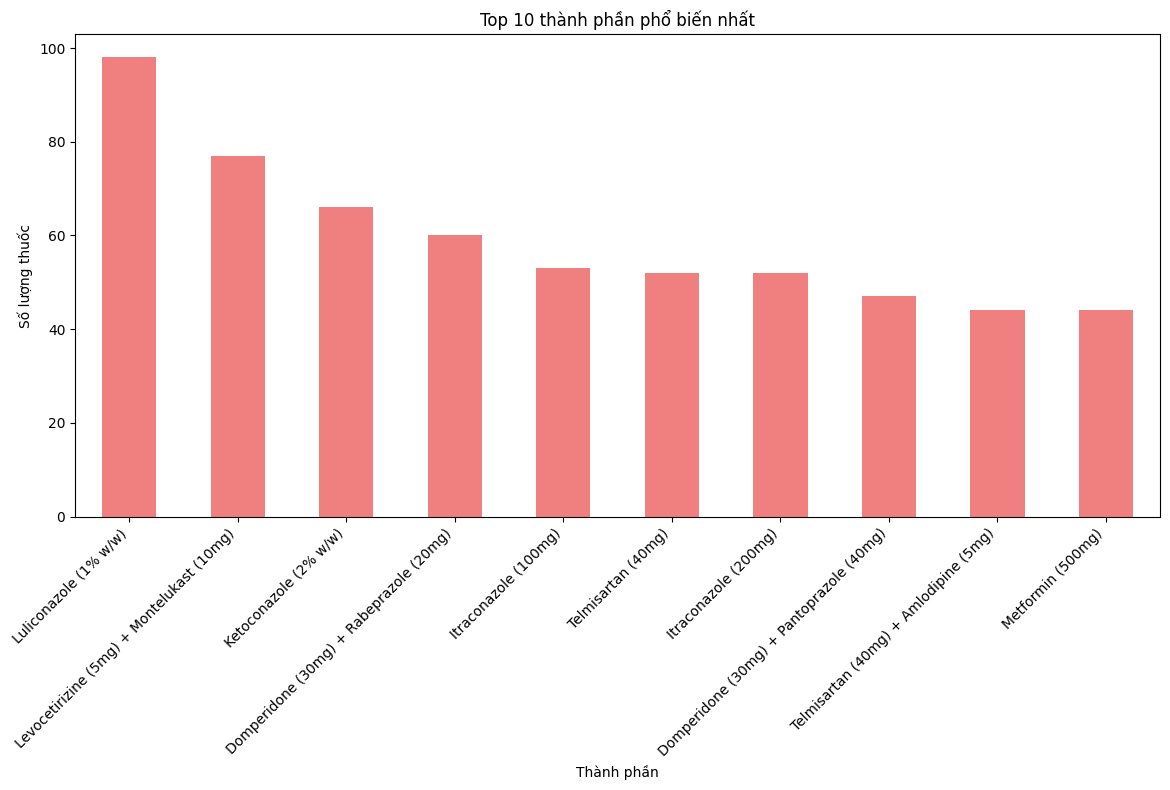

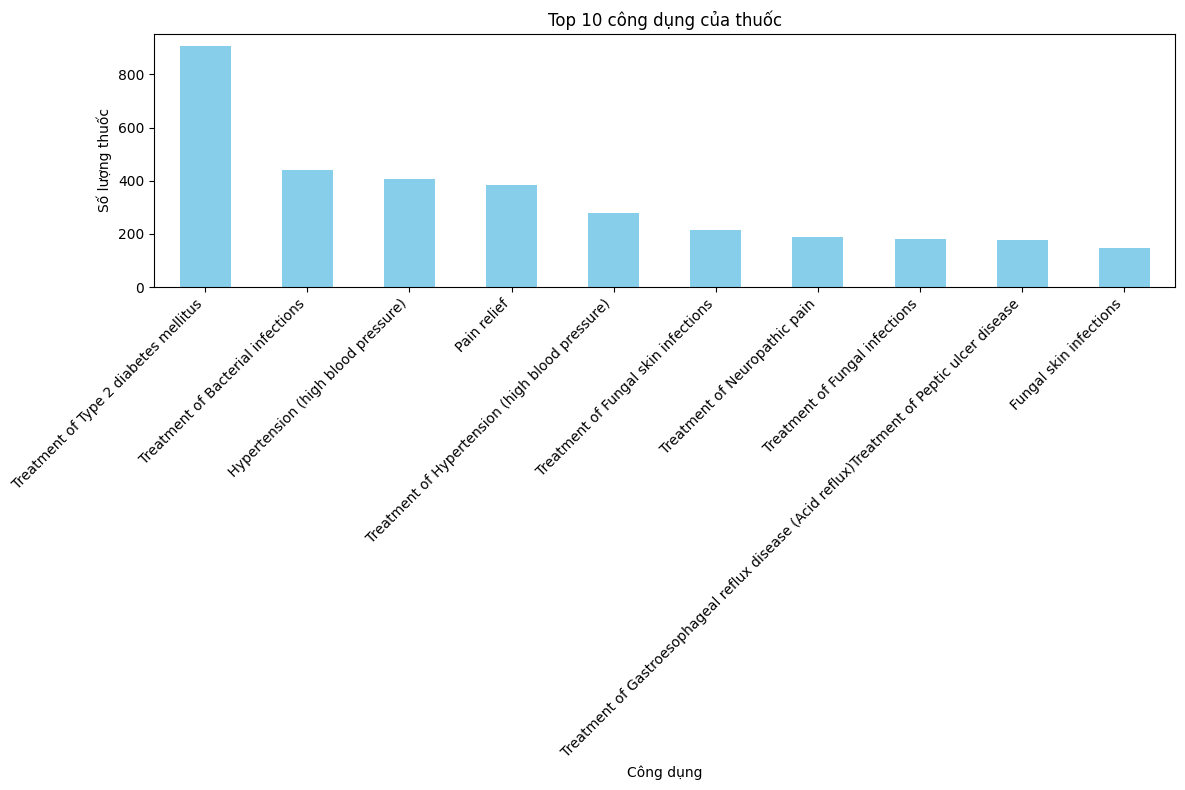

<ipython-input-7-87973b9c731f>:31: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


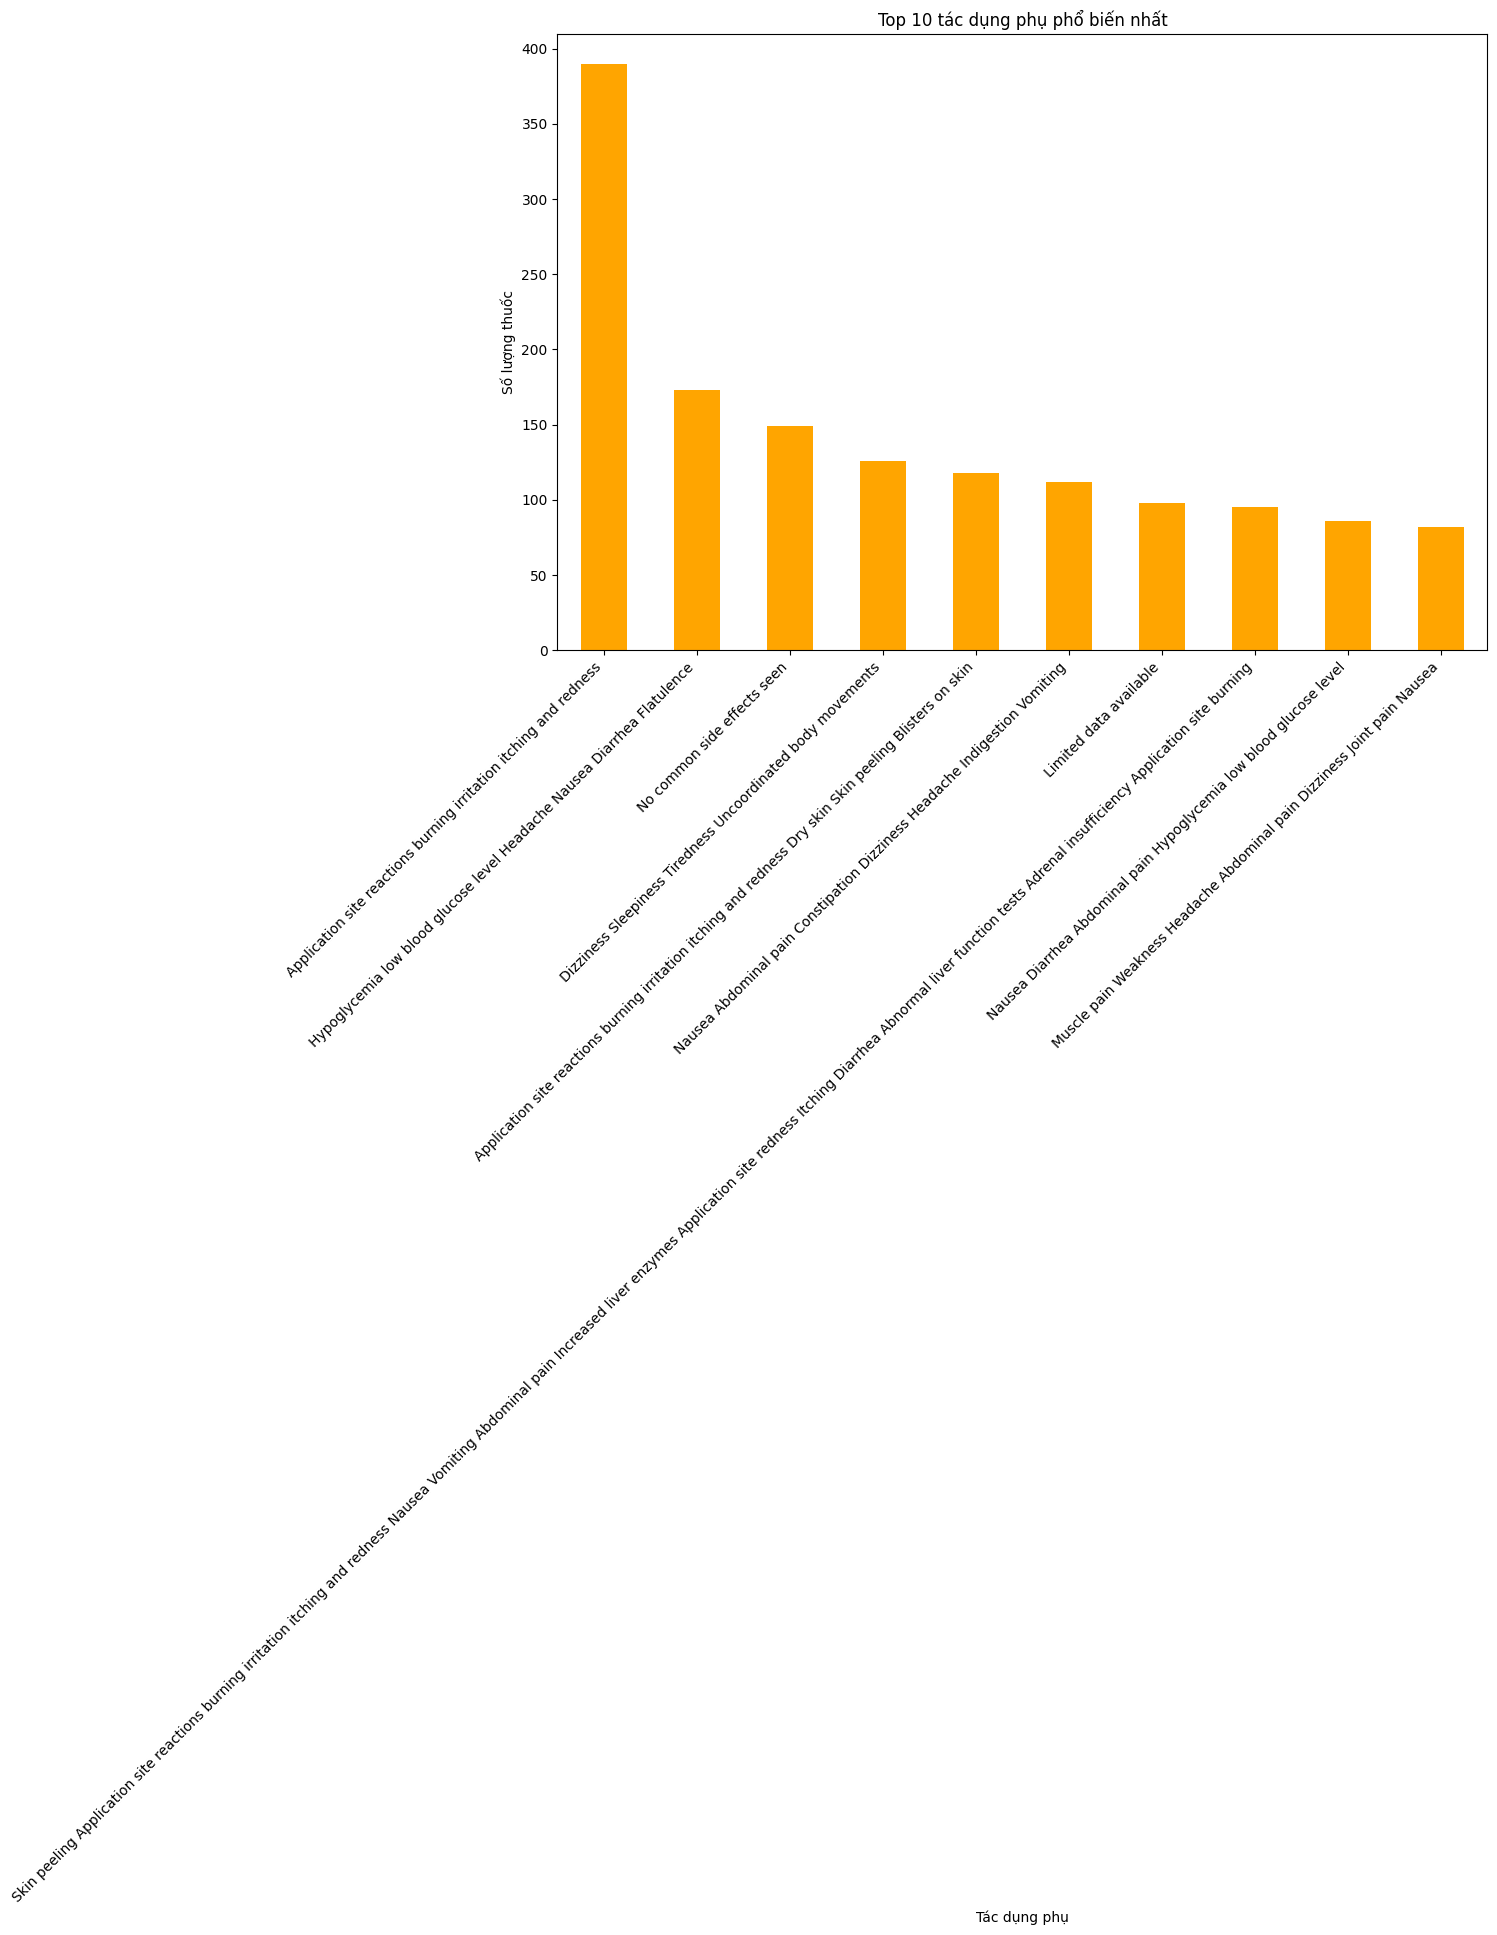

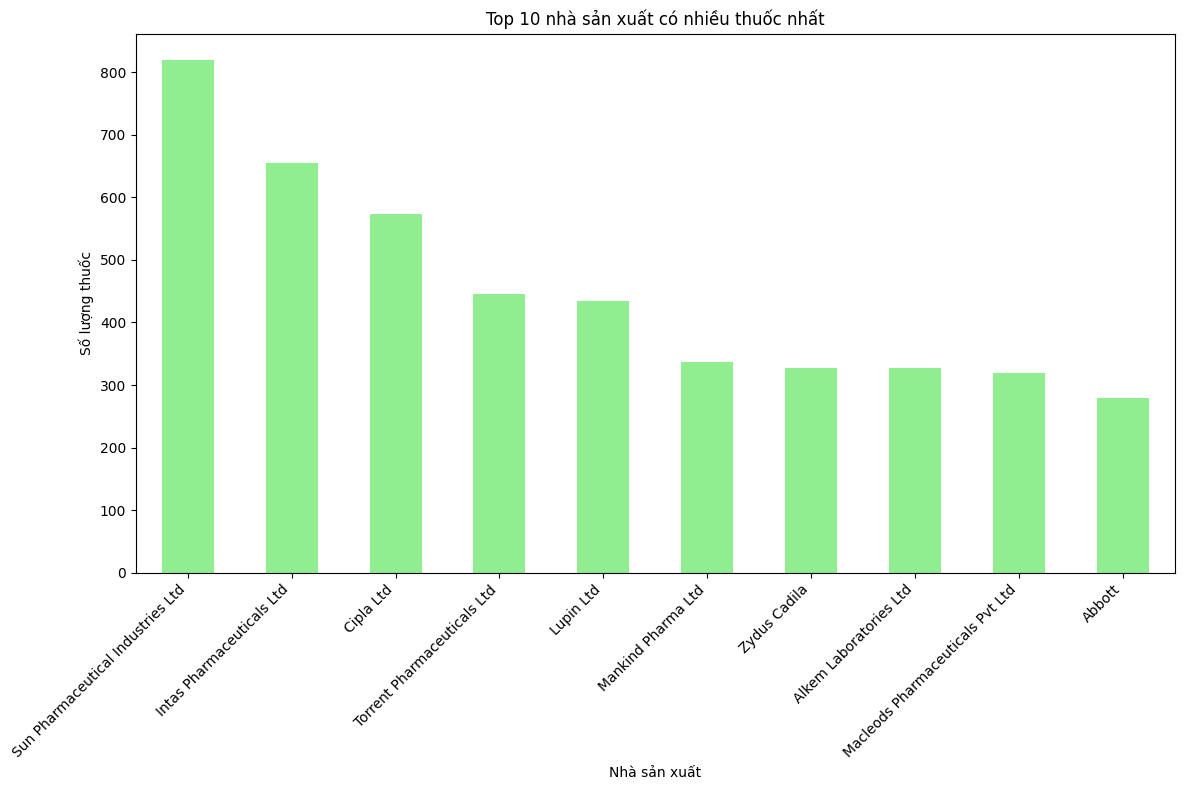

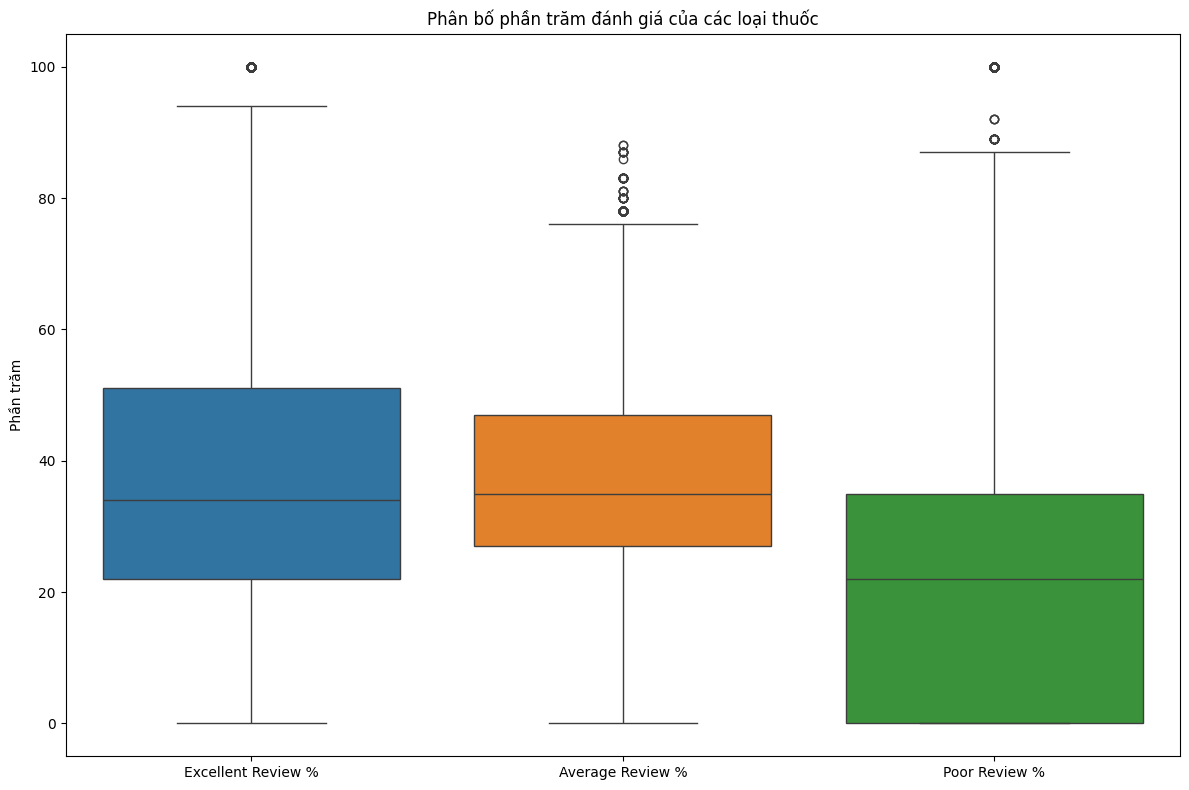

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Vẽ biểu đồ cột cho thành phần phổ biến nhất
plt.figure(figsize=(12, 8))
Medicine_Details['Composition'].value_counts().head(10).plot(kind='bar', color='lightcoral')
plt.title('Top 10 thành phần phổ biến nhất')
plt.xlabel('Thành phần')
plt.ylabel('Số lượng thuốc')
plt.xticks(rotation=45, ha='right')  # Xoay và căn chỉnh chữ
plt.tight_layout()
plt.show()

# Vẽ biểu đồ cột cho công dụng thuốc
plt.figure(figsize=(12, 8))
Medicine_Details['Uses'].value_counts().head(10).plot(kind='bar', color='skyblue')
plt.title('Top 10 công dụng của thuốc')
plt.xlabel('Công dụng')
plt.ylabel('Số lượng thuốc')
plt.xticks(rotation=45, ha='right')  # Xoay và căn chỉnh chữ
plt.tight_layout()
plt.show()

# Vẽ biểu đồ cột cho tác dụng phụ phổ biến nhất
plt.figure(figsize=(12, 8))
Medicine_Details['Side_effects'].value_counts().head(10).plot(kind='bar', color='orange')
plt.title('Top 10 tác dụng phụ phổ biến nhất')
plt.xlabel('Tác dụng phụ')
plt.ylabel('Số lượng thuốc')
plt.xticks(rotation=45, ha='right')  # Xoay và căn chỉnh chữ
plt.tight_layout()
plt.show()

# Vẽ biểu đồ cột cho các nhà sản xuất phổ biến
plt.figure(figsize=(12, 8))
Medicine_Details['Manufacturer'].value_counts().head(10).plot(kind='bar', color='lightgreen')
plt.title('Top 10 nhà sản xuất có nhiều thuốc nhất')
plt.xlabel('Nhà sản xuất')
plt.ylabel('Số lượng thuốc')
plt.xticks(rotation=45, ha='right')  # Xoay và căn chỉnh chữ
plt.tight_layout()
plt.show()

# Vẽ boxplot cho phần trăm đánh giá
plt.figure(figsize=(12, 8))
sns.boxplot(data=Medicine_Details[['Excellent Review %', 'Average Review %', 'Poor Review %']])
plt.title('Phân bố phần trăm đánh giá của các loại thuốc')
plt.ylabel('Phần trăm')
plt.tight_layout()
plt.show()



**2.Look for correlations**

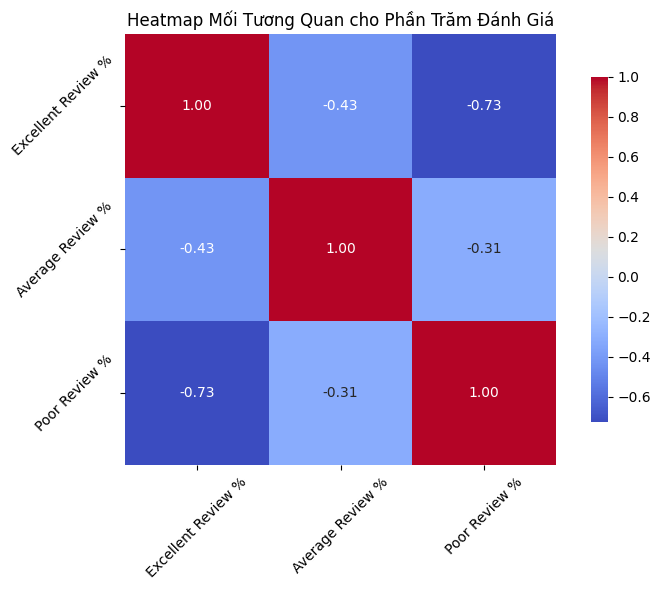

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Tính toán ma trận tương quan cho các phần trăm đánh giá
correlation_matrix = Medicine_Details[['Excellent Review %', 'Average Review %', 'Poor Review %']].corr()

# Thiết lập hình vẽ matplotlib
plt.figure(figsize=(8, 6))

# Vẽ heatmap
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})

# Tiêu đề và nhãn
plt.title('Heatmap Mối Tương Quan cho Phần Trăm Đánh Giá')
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.tight_layout()
plt.show()



In [9]:
# Tìm cặp mối tương quan mạnh nhất
correlation_matrix = Medicine_Details[['Excellent Review %', 'Average Review %', 'Poor Review %']].corr()
strongest_correlation = correlation_matrix.unstack().sort_values(ascending=False)

# Lọc ra các mối tương quan không trùng lặp
strongest_correlation = strongest_correlation[strongest_correlation < 1]

# Hiển thị mối tương quan mạnh nhất
strongest_correlation.head(1)


,,0
Average Review %,Poor Review %,-0.311464


**3.Experiment with attribute combinations**

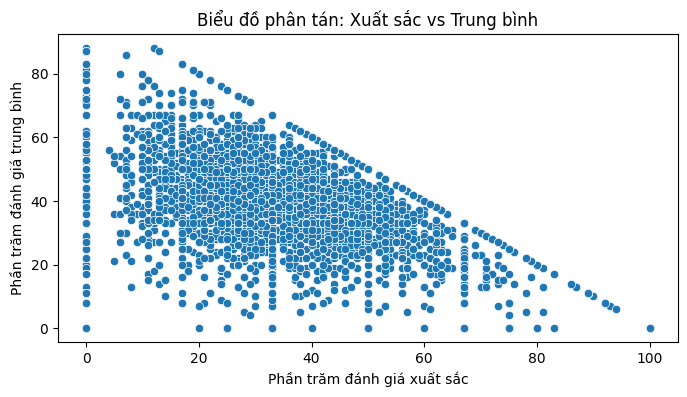

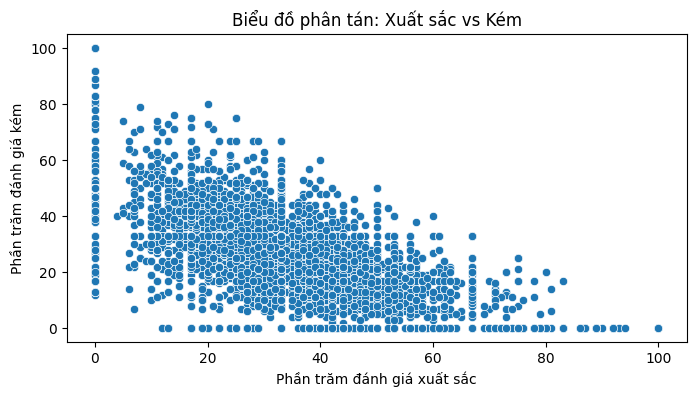

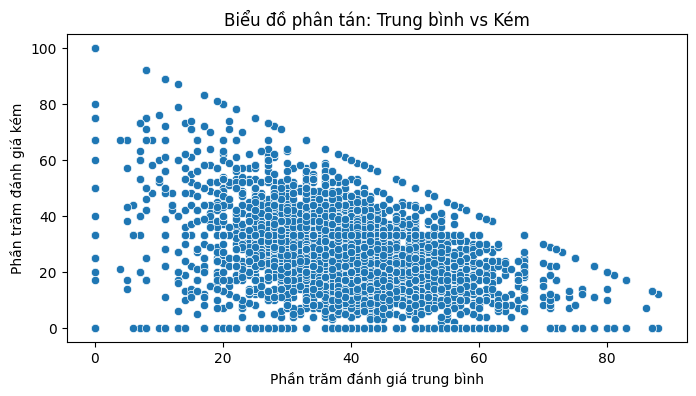

In [10]:
# Vẽ biểu đồ phân tán giữa phần trăm đánh giá xuất sắc và trung bình
plt.figure(figsize=(8, 4))
sns.scatterplot(data=Medicine_Details, x='Excellent Review %', y='Average Review %')
plt.title('Biểu đồ phân tán: Xuất sắc vs Trung bình')
plt.xlabel('Phần trăm đánh giá xuất sắc')
plt.ylabel('Phần trăm đánh giá trung bình')
plt.show()

# Vẽ biểu đồ phân tán giữa phần trăm đánh giá xuất sắc và kém
plt.figure(figsize=(8, 4))
sns.scatterplot(data=Medicine_Details, x='Excellent Review %', y='Poor Review %')
plt.title('Biểu đồ phân tán: Xuất sắc vs Kém')
plt.xlabel('Phần trăm đánh giá xuất sắc')
plt.ylabel('Phần trăm đánh giá kém')
plt.show()

# Vẽ biểu đồ phân tán giữa phần trăm đánh giá trung bình và kém
plt.figure(figsize=(8, 4))
sns.scatterplot(data=Medicine_Details, x='Average Review %', y='Poor Review %')
plt.title('Biểu đồ phân tán: Trung bình vs Kém')
plt.xlabel('Phần trăm đánh giá trung bình')
plt.ylabel('Phần trăm đánh giá kém')
plt.show()


In [11]:
import statsmodels.api as sm

# Xác định biến độc lập và biến phụ thuộc
X = Medicine_Details['Excellent Review %']  # Biến độc lập
y = Medicine_Details['Poor Review %']        # Biến phụ thuộc

# Thêm hằng số vào biến độc lập
X = sm.add_constant(X)

# Tạo mô hình hồi quy
model = sm.OLS(y, X).fit()

# Hiển thị tóm tắt mô hình hồi quy
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:          Poor Review %   R-squared:                       0.526
Model:                            OLS   Adj. R-squared:                  0.526
Method:                 Least Squares   F-statistic:                 1.314e+04
Date:                Sat, 12 Oct 2024   Prob (F-statistic):               0.00
Time:                        02:45:11   Log-Likelihood:                -49936.
No. Observations:               11825   AIC:                         9.988e+04
Df Residuals:                   11823   BIC:                         9.989e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 52.3064      0

## III. Prepare the data for machine learning algorithms.

**1.Clean the data**

In [12]:
# Kiểm tra dữ liệu bị thiếu
print(Medicine_Details.isnull().sum())

# Chọn các cột số để tính toán giá trị trung bình
numeric_columns = Medicine_Details.select_dtypes(include=['number']).columns

# Xử lý dữ liệu bị thiếu cho các cột số
Medicine_Details[numeric_columns] = Medicine_Details[numeric_columns].fillna(Medicine_Details[numeric_columns].mean())

# Xử lý dữ liệu bị thiếu cho các cột phân loại (nếu cần)
# Ở đây, chúng ta sẽ điền bằng giá trị phổ biến nhất cho các cột phân loại
categorical_columns = Medicine_Details.select_dtypes(exclude=['number']).columns
for column in categorical_columns:
    Medicine_Details[column].fillna(Medicine_Details[column].mode()[0], inplace=True)

Medicine Name         0
Composition           0
Uses                  0
Side_effects          0
Image URL             0
Manufacturer          0
Excellent Review %    0
Average Review %      0
Poor Review %         0
dtype: int64


<ipython-input-12-313ecb06f65a>:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  Medicine_Details[column].fillna(Medicine_Details[column].mode()[0], inplace=True)


**2.Handling text and categorical attributes**

In [13]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np # Import numpy and alias it as np
import pandas as pd  # Import pandas for DataFrame creation


# Tải các gói stopwords và wordnet từ nltk
nltk.download('stopwords')
nltk.download('wordnet')

# Khởi tạo bộ lọc từ dừng và lemmatizer
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

# Hàm xử lý văn bản
def clean_text(text):
    # Chuyển văn bản về chữ thường
    text = text.lower()
    # Tách từ và loại bỏ từ dừng
    words = text.split()
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]
    return ' '.join(words)

# Áp dụng làm sạch văn bản cho các cột
Medicine_Details['Composition_cleaned'] = Medicine_Details['Composition'].apply(clean_text)
Medicine_Details['Uses_cleaned'] = Medicine_Details['Uses'].apply(clean_text)
Medicine_Details['Side_effects_cleaned'] = Medicine_Details['Side_effects'].apply(clean_text)

# Chuyển đổi văn bản thành số sử dụng TF-IDF
tfidf = TfidfVectorizer()

composition_tfidf = tfidf.fit_transform(Medicine_Details['Composition_cleaned']).toarray()
uses_tfidf = tfidf.fit_transform(Medicine_Details['Uses_cleaned']).toarray()
side_effects_tfidf = tfidf.fit_transform(Medicine_Details['Side_effects_cleaned']).toarray()

# Tạo DataFrame từ các đặc trưng đã chuyển đổi
X_tfidf = pd.DataFrame(
    data=np.hstack([composition_tfidf, uses_tfidf, side_effects_tfidf]), # Use np.hstack
    columns=[f'feature_{i}' for i in range(composition_tfidf.shape[1] + uses_tfidf.shape[1] + side_effects_tfidf.shape[1])]
)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


**3.Feature scaling and transformation**

In [14]:
from sklearn.preprocessing import StandardScaler

# Ví dụ chuẩn hóa các cột số (nếu có)
scaler = StandardScaler()

# Giả sử chúng ta có các cột số khác cần chuẩn hóa
# X_scaled = scaler.fit_transform(Medicine_Details[['Column1', 'Column2']])


**4.Custom Transformers**

In [15]:
from sklearn.base import BaseEstimator, TransformerMixin

class TextCleaner(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.stop_words = set(stopwords.words('english'))
        self.lemmatizer = WordNetLemmatizer()

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return X.apply(self.clean_text)

    def clean_text(self, text):
        words = text.lower().split()
        words = [self.lemmatizer.lemmatize(word) for word in words if word not in self.stop_words]
        return ' '.join(words)


**5.Transformation Pipelines**

In [16]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier

# Xây dựng pipeline
pipeline = Pipeline([
    ('text_cleaner', TextCleaner()),  # Bước làm sạch văn bản
    ('tfidf', TfidfVectorizer()),  # Chuyển đổi văn bản thành đặc trưng số
    ('classifier', RandomForestClassifier())  # Huấn luyện mô hình phân loại
])

**6.Create test set and traning set**

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Khởi tạo LabelEncoder
label_encoder_composition = LabelEncoder()
label_encoder_uses = LabelEncoder()
label_encoder_side_effects = LabelEncoder()

# Mã hóa các cột
Medicine_Details['Composition_encoded'] = label_encoder_composition.fit_transform(Medicine_Details['Composition'])
Medicine_Details['Uses_encoded'] = label_encoder_uses.fit_transform(Medicine_Details['Uses'])
Medicine_Details['Side_effects_encoded'] = label_encoder_side_effects.fit_transform(Medicine_Details['Side_effects'])

# Chọn các đặc trưng và cột mục tiêu
X = Medicine_Details[['Composition_encoded', 'Side_effects_encoded']]  # Chọn các đặc trưng
y = Medicine_Details['Uses_encoded']  # Cột mục tiêu

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# In ra kích thước của các tập dữ liệu
print(f"Kích thước tập huấn luyện: {X_train.shape}, {y_train.shape}")
print(f"Kích thước tập kiểm tra: {X_test.shape}, {y_test.shape}")


Kích thước tập huấn luyện: (9460, 2), (9460,)
Kích thước tập kiểm tra: (2365, 2), (2365,)


## IV. Select a model and train it

 **1.Train and Evaluate on the Training Set**

 a. Random Forest

In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Khởi tạo mô hình Random Forest
rf_model = RandomForestClassifier(random_state=42)

# Huấn luyện mô hình trên tập huấn luyện
rf_model.fit(X_train, y_train)

# Dự đoán trên tập kiểm tra
y_pred_rf = rf_model.predict(X_test)

# Đánh giá mô hình
accuracy_rf = accuracy_score(y_test, y_pred_rf)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
class_report_rf = classification_report(y_test, y_pred_rf)

print("Random Forest Model:")
print("Accuracy:", accuracy_rf)
print("Confusion Matrix:\n", conf_matrix_rf)
print("Classification Report:\n", class_report_rf)


Random Forest Model:
Accuracy: 0.9276955602536998
Confusion Matrix:
 [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 2 ... 0 0 0]
 ...
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 2]]
Classification Report:
               precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         1
           4       0.67      0.67      0.67         3
           5       0.00      0.00      0.00         0
           7       0.50      1.00      0.67         1
           8       1.00      0.70      0.82        10
           9       0.00      0.00      0.00         1
          12       1.00      1.00      1.00         1
          14       1.00      1.00      1.00         1
          15       1.00      1.00      1.00         1
          18       1.00      1.00      1.00         3
          19       1.00      1.00      1.00         1
          23       1.00      1.00      1.00         1
          24       1.00      1

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_

b. K-Nearest Neighbors (KNN)

In [19]:
from sklearn.neighbors import KNeighborsClassifier

# Khởi tạo mô hình KNN
knn_model = KNeighborsClassifier(n_neighbors=5)

# Huấn luyện mô hình trên tập huấn luyện
knn_model.fit(X_train, y_train)

# Dự đoán trên tập kiểm tra
y_pred_knn = knn_model.predict(X_test)

# Đánh giá mô hình
accuracy_knn = accuracy_score(y_test, y_pred_knn)
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
class_report_knn = classification_report(y_test, y_pred_knn)

print("K-Nearest Neighbors Model:")
print("Accuracy:", accuracy_knn)
print("Confusion Matrix:\n", conf_matrix_knn)
print("Classification Report:\n", class_report_knn)


K-Nearest Neighbors Model:
Accuracy: 0.8498942917547568
Confusion Matrix:
 [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 2 ... 0 0 0]
 ...
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 2]]
Classification Report:
               precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         1
           4       0.50      0.67      0.57         3
           7       0.20      1.00      0.33         1
           8       0.58      0.70      0.64        10
           9       0.00      0.00      0.00         1
          12       1.00      1.00      1.00         1
          14       0.00      0.00      0.00         1
          15       1.00      1.00      1.00         1
          16       0.00      0.00      0.00         0
          18       0.75      1.00      0.86         3
          19       1.00      1.00      1.00         1
          22       0.00      0.00      0.00         0
          23       1.00 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_

c. Decision Tree

In [20]:
from sklearn.tree import DecisionTreeClassifier

# Khởi tạo mô hình Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)

# Huấn luyện mô hình trên tập huấn luyện
dt_model.fit(X_train, y_train)

# Dự đoán trên tập kiểm tra
y_pred_dt = dt_model.predict(X_test)

# Đánh giá mô hình
accuracy_dt = accuracy_score(y_test, y_pred_dt)
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)
class_report_dt = classification_report(y_test, y_pred_dt)

print("Decision Tree Model:")
print("Accuracy:", accuracy_dt)
print("Confusion Matrix:\n", conf_matrix_dt)
print("Classification Report:\n", class_report_dt)


Decision Tree Model:
Accuracy: 0.9217758985200846
Confusion Matrix:
 [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 2 ... 0 0 0]
 ...
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 2]]
Classification Report:
               precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         1
           4       0.67      0.67      0.67         3
           5       0.00      0.00      0.00         0
           6       0.00      0.00      0.00         0
           7       0.50      1.00      0.67         1
           8       1.00      0.70      0.82        10
           9       0.00      0.00      0.00         1
          12       1.00      1.00      1.00         1
          14       1.00      1.00      1.00         1
          15       1.00      1.00      1.00         1
          18       1.00      1.00      1.00         3
          19       1.00      1.00      1.00         1
          23       1.00      1

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_

**2.Better Evaluation Using Cross Validation**

In [21]:
from sklearn.model_selection import cross_val_score

# Định nghĩa số lượng folds
k = 3  # Hoặc bạn có thể chọn giá trị khác

# Sử dụng Cross Validation cho các mô hình

# 1. K-Nearest Neighbors (KNN)
knn_cv_scores = cross_val_score(KNeighborsClassifier(n_neighbors=5), X, y, cv=k)
print("K-Nearest Neighbors CV Scores:", knn_cv_scores)
print("Mean CV Score (KNN):", knn_cv_scores.mean())

# 2. Decision Tree
dt_cv_scores = cross_val_score(DecisionTreeClassifier(random_state=42), X, y, cv=k)
print("Decision Tree CV Scores:", dt_cv_scores)
print("Mean CV Score (Decision Tree):", dt_cv_scores.mean())

# 3. Random Forest
rf_cv_scores = cross_val_score(RandomForestClassifier(random_state=42), X, y, cv=k)
print("Random Forest CV Scores:", rf_cv_scores)
print("Mean CV Score (Random Forest):", rf_cv_scores.mean())


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(


K-Nearest Neighbors CV Scores: [0.77118214 0.79705733 0.79979701]
Mean CV Score (KNN): 0.7893454927283812


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(


Decision Tree CV Scores: [0.86478945 0.90690005 0.88556204]
Mean CV Score (Decision Tree): 0.8857505126027475


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(


Random Forest CV Scores: [0.87620497 0.91400304 0.89672672]
Mean CV Score (Random Forest): 0.8956449117807463


## V. Fine-tune your model

**1.Grid Search**

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Định nghĩa tham số cho Grid Search
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

# Khởi tạo mô hình Random Forest
rf_model = RandomForestClassifier(random_state=42)

# Khởi tạo Grid Search
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=3, n_jobs=-1, scoring='accuracy')

# Huấn luyện Grid Search
grid_search.fit(X_train, y_train)

# In ra các tham số tốt nhất và độ chính xác
print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))



/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


KeyboardInterrupt: 

**2.Randomized Search**

In [27]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Định nghĩa tham số cho Randomized Search
param_dist = {
    'n_estimators': randint(50, 200),
    'max_depth': [None] + list(range(10, 51, 10)),
    'min_samples_split': randint(2, 11)
}

# Khởi tạo mô hình Random Forest
rf_model_random = RandomForestClassifier(random_state=42)

# Khởi tạo Randomized Search
random_search = RandomizedSearchCV(estimator=rf_model_random, param_distributions=param_dist, n_iter=100, cv=3, n_jobs=-1, scoring='accuracy', random_state=42)

# Huấn luyện Randomized Search
random_search.fit(X_train, y_train)

# In ra các tham số tốt nhất và độ chính xác
print("Best parameters found: ", random_search.best_params_)
print("Best cross-validation score: {:.2f}".format(random_search.best_score_))


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


KeyboardInterrupt: 

**3.Ensemble Methods**

In [24]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier

# Khởi tạo các mô hình khác nhau
# KNeighborsClassifier does not have a random_state parameter. Removing it.
model1 = KNeighborsClassifier()
model2 = RandomForestClassifier(random_state=42)
model3 = DecisionTreeClassifier(random_state=42)

# Khởi tạo Voting Classifier
voting_model = VotingClassifier(estimators=[('lr', model1), ('rf', model2), ('gb', model3)], voting='hard')

# Huấn luyện Voting Classifier
voting_model.fit(X_train, y_train)

# Dự đoán trên tập kiểm tra
y_pred_voting = voting_model.predict(X_test)

# Đánh giá mô hình
accuracy_voting = accuracy_score(y_test, y_pred_voting)
print("Voting Classifier Accuracy:", accuracy_voting)

Voting Classifier Accuracy: 0.9264270613107822


**4.Analyzing the Best Models and Their Errors**

In [25]:
from sklearn.metrics import confusion_matrix, classification_report

# Ma trận nhầm lẫn cho mô hình tốt nhất
conf_matrix = confusion_matrix(y_test, y_pred_voting)
class_report = classification_report(y_test, y_pred_voting)

print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)


Confusion Matrix:
 [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 2 ... 0 0 0]
 ...
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 2]]
Classification Report:
               precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         1
           4       0.50      0.67      0.57         3
           5       0.00      0.00      0.00         0
           6       0.00      0.00      0.00         0
           7       0.50      1.00      0.67         1
           8       1.00      0.70      0.82        10
           9       0.00      0.00      0.00         1
          12       1.00      1.00      1.00         1
          14       1.00      1.00      1.00         1
          15       1.00      1.00      1.00         1
          18       1.00      1.00      1.00         3
          19       1.00      1.00      1.00         1
          23       1.00      1.00      1.00         1
          24       1.00   

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_

**5.Evaluate Your System on Test Set**

In [26]:
# Dự đoán trên tập kiểm tra với mô hình tốt nhất
best_model = grid_search.best_estimator_  # Hoặc mô hình tốt nhất từ Randomized Search

y_test_pred = best_model.predict(X_test)

# Đánh giá mô hình trên tập kiểm tra
test_accuracy = accuracy_score(y_test, y_test_pred)
test_conf_matrix = confusion_matrix(y_test, y_test_pred)
test_class_report = classification_report(y_test, y_test_pred)

print("Test Set Accuracy:", test_accuracy)
print("Test Set Confusion Matrix:\n", test_conf_matrix)
print("Test Set Classification Report:\n", test_class_report)


NameError: name 'grid_search' is not defined

## VI. Present your solution

## VII.Launch, monitor, and maintain your system